# 📚 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras import regularizers

# 📖 Data

In [2]:
img_dir = '/kaggle/input/mango-leaf-disease-dataset'
data = tf.keras.preprocessing.image_dataset_from_directory(img_dir)

Found 4000 files belonging to 8 classes.


### Defining parameters and generating training and validation data streams with data augmentation using ImageDataGenerator in TensorFlow.

In [3]:
# Set the input parameters
num_images = data.cardinality().numpy() * 32
img_size = (224, 224)
batch_size = 64
n_classes = 8

# Create the ImageDataGenerator object
datagen = ImageDataGenerator(
        rescale = 1./255,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.3,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest',
        validation_split = 0.20)

# Read original images from input directory
train_data = datagen.flow_from_directory(
    img_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    img_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation')

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


# 🖼️ Random images from data

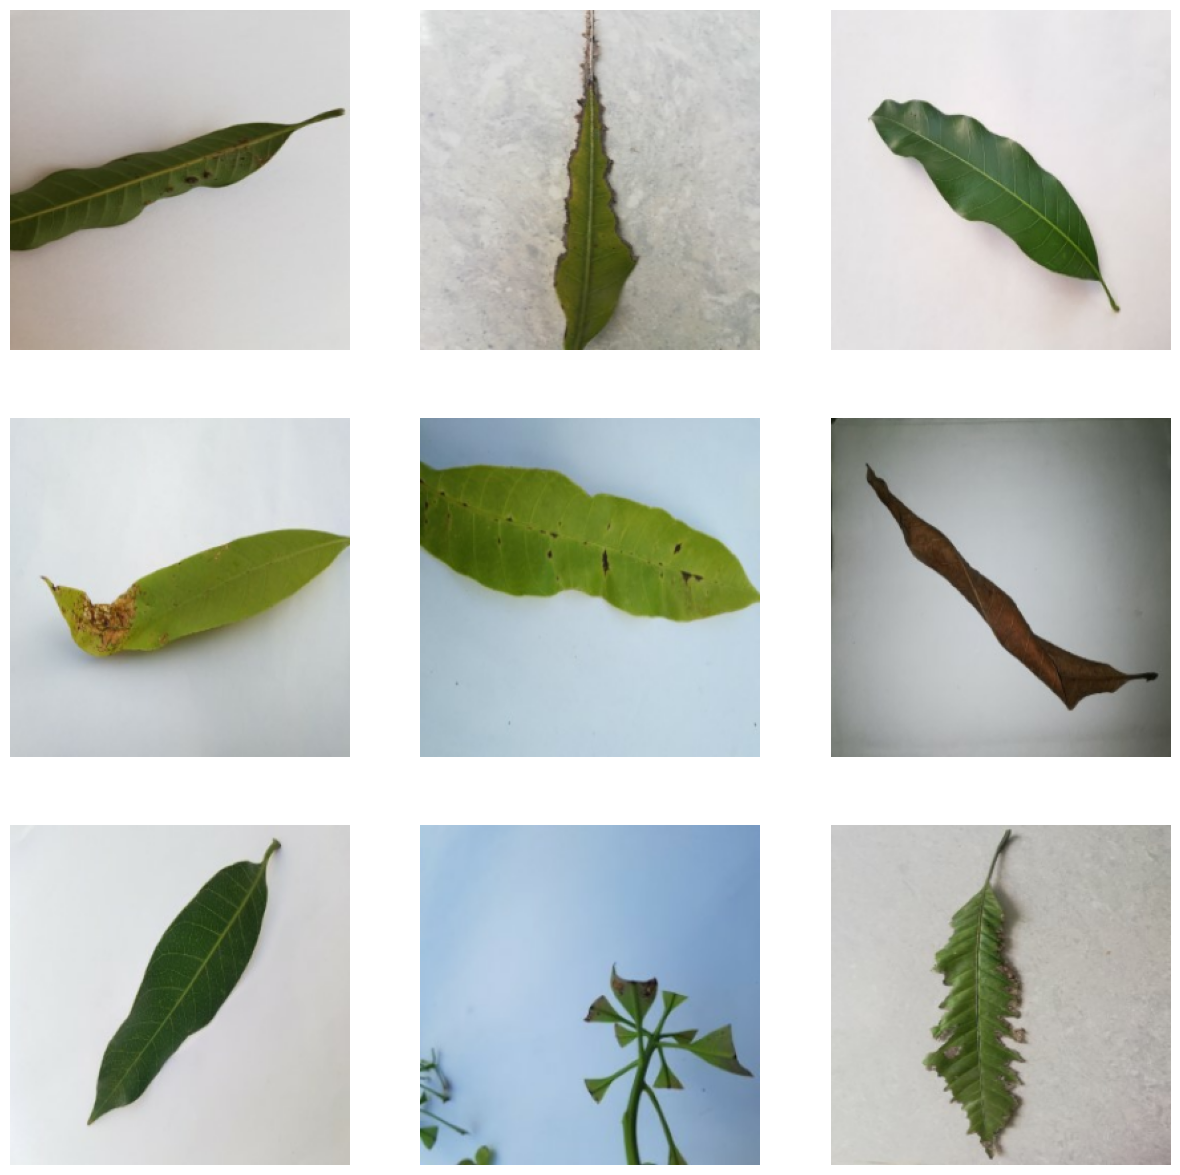

In [4]:
plt.figure(figsize = (15,15))
for images, labels in data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i].numpy().astype('uint8'))
        ax.axis('off')

### Loading pre-trained InceptionV3 model and freezing layers

In [5]:
pre_trained = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

for layer in pre_trained.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 1s 0us/step


# 🤖 Model creation

In [6]:
model = Sequential([
    pre_trained,
    Flatten(),
    BatchNormalization(axis =- 1, momentum = 0.50, epsilon = 0.001),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(n_classes, activation = 'softmax', kernel_regularizer = regularizers.l1(0.001))
])


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 batch_normalization_94 (Bat  (None, 51200)            204800    
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 64)                3276864   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

# 📋 Training and Results

In [7]:
history = model.fit(train_data, epochs = 25, validation_data = val_data)

Epoch 1/25
50/50 [==============================] - 87s 1s/step - loss: 2.0448 - accuracy: 0.7922 - val_loss: 1.6465 - val_accuracy: 0.8625
Epoch 2/25
50/50 [==============================] - 55s 1s/step - loss: 1.0324 - accuracy: 0.9050 - val_loss: 1.8971 - val_accuracy: 0.8712
Epoch 3/25
50/50 [==============================] - 55s 1s/step - loss: 0.9589 - accuracy: 0.9066 - val_loss: 1.6000 - val_accuracy: 0.8875
Epoch 4/25
50/50 [==============================] - 55s 1s/step - loss: 0.9700 - accuracy: 0.9169 - val_loss: 1.2422 - val_accuracy: 0.9025
Epoch 5/25
50/50 [==============================] - 56s 1s/step - loss: 0.7227 - accuracy: 0.9350 - val_loss: 1.4841 - val_accuracy: 0.8988
Epoch 6/25
50/50 [==============================] - 55s 1s/step - loss: 0.5887 - accuracy: 0.9481 - val_loss: 1.6358 - val_accuracy: 0.8913
Epoch 7/25
50/50 [==============================] - 55s 1s/step - loss: 0.6283 - accuracy: 0.9434 - val_loss: 1.3616 - val_accuracy: 0.8938
Epoch 8/25
50/50 [==

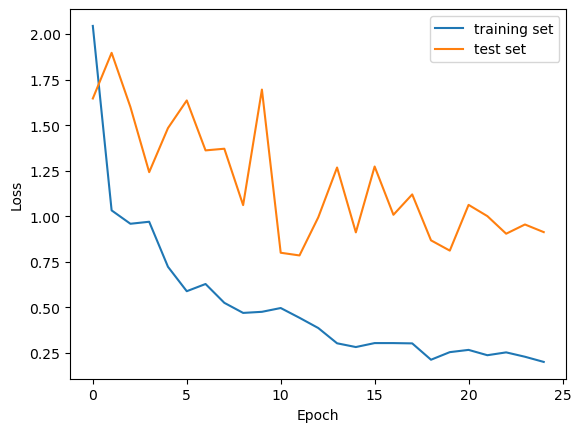

In [8]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label = 'training set')
plt.plot(history.history['val_loss'], label = 'test set')
plt.legend()

# 🏁 The End! Feel free to criticize! 🏁